# import libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data.

In [2]:
content = pd.read_csv(r'C:\Users\roaia\Desktop\Anwar\New folder\accenture_virtual_experience_VE_by_Forage\Content.csv')
reactions = pd.read_csv(r'C:\Users\roaia\Desktop\Anwar\New folder\accenture_virtual_experience_VE_by_Forage\Reactions.csv')
reaction_types = pd.read_csv(r'C:\Users\roaia\Desktop\Anwar\New folder\accenture_virtual_experience_VE_by_Forage\ReactionTypes.csv')

In [3]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [4]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [5]:
reaction_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [6]:
# drop 'Unnamed: 0' column.
content.drop(columns='Unnamed: 0', axis=1, inplace=True)
reactions.drop(columns='Unnamed: 0', axis=1, inplace=True)
reaction_types.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [7]:
content.head(2)

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...


In [8]:
reactions.head(2)

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50


In [9]:
reaction_types.head(2)

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70


# Prepare and Clean

In [10]:
# drop 'User ID', 'URL' columns.
content.drop(columns=['User ID', 'URL'], axis=1, inplace=True)
reactions.drop(columns='User ID', axis=1, inplace=True)

In [11]:
content.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [12]:
reactions.head()

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [13]:
# rename 'Type' column to avoid conflect.
content.rename(columns={'Type':'content_type'}, inplace=True)
reactions.rename(columns={'Type':'reactions_type'}, inplace=True)
reaction_types.rename(columns={'Type':'reactions_type'}, inplace=True)

In [14]:
content.head(2)

,Content ID,content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating


In [15]:
reactions.head(2)

,Content ID,reactions_type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50


In [16]:
reaction_types.head(2)

,reactions_type,Sentiment,Score
0,heart,positive,60
1,want,positive,70


In [17]:
# merge content & reactions on 'Content ID' and save result in content_reactions.
content_reactions = content.merge(reactions, on='Content ID')
content_reactions.head(2)

,Content ID,content_type,Category,reactions_type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50


In [18]:
# merge content_reactions &  reaction_types on 'reactions_type' and save result in df.
df = content_reactions.merge(reaction_types, on='reactions_type')
df.head(2)

,Content ID,content_type,Category,reactions_type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0


In [19]:
# check data validity.
df.select_dtypes(include=['object', 'datetime']).describe()

,Content ID,content_type,Category,reactions_type,Datetime,Sentiment
count,24573,24573,24573,24573,24573,24573
unique,962,4,40,16,24562,3
top,d90a34f1-60ed-4a79-b7bf-fd22efa12e4c,photo,animals,heart,2020-07-23 09:21:02,positive
freq,48,6589,1765,1622,2,13807


In [20]:
print(df['content_type'].unique())

['photo' 'video' 'GIF' 'audio']


In [21]:
print(df['Sentiment'].unique())

['negative' 'positive' 'neutral']


In [22]:
print(df['reactions_type'].unique())

['disgust' 'dislike' 'scared' 'interested' 'peeking' 'cherish' 'hate'
 'love' 'indifferent' 'super love' 'intrigued' 'worried' 'like' 'heart'
 'want' 'adore']


In [23]:
print(df['Category'].unique())

['Studying' 'healthy eating' 'dogs' 'public speaking' 'science' 'tennis'
 'food' 'fitness' 'soccer' 'education' 'studying' 'travel' 'veganism'
 'cooking' 'technology' 'animals' 'culture' 'Fitness' 'Veganism'
 '"animals"' 'Travel' '"soccer"' 'Animals' 'Education' '"dogs"'
 '"culture"' 'Soccer' 'Culture' 'Food' '"technology"' '"cooking"'
 '"public speaking"' 'Science' '"veganism"' 'Public Speaking' '"science"'
 '"studying"' '"food"' 'Healthy Eating' 'Technology']


In [24]:
# replace " " from values.
df['Category'] = df['Category'].str.replace('"', '', regex=True)
df['Category'].unique()

array(['Studying', 'healthy eating', 'dogs', 'public speaking', 'science',
       'tennis', 'food', 'fitness', 'soccer', 'education', 'studying',
       'travel', 'veganism', 'cooking', 'technology', 'animals',
       'culture', 'Fitness', 'Veganism', 'Travel', 'Animals', 'Education',
       'Soccer', 'Culture', 'Food', 'Science', 'Public Speaking',
       'Healthy Eating', 'Technology'], dtype=object)

In [25]:
# check data types.
df.dtypes

Content ID        object
content_type      object
Category          object
reactions_type    object
Datetime          object
Sentiment         object
Score              int64
dtype: object

In [26]:
# convert 'Datetime' to datetime.
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Datetime'].dtype

dtype('<M8[ns]')

# Analysis

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Content ID      24573 non-null  object        
 1   content_type    24573 non-null  object        
 2   Category        24573 non-null  object        
 3   reactions_type  24573 non-null  object        
 4   Datetime        24573 non-null  datetime64[ns]
 5   Sentiment       24573 non-null  object        
 6   Score           24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.5+ MB


## **Q:How many count for each content_type?**

In [28]:
df['content_type'].value_counts(ascending=False)

photo    6589
video    6245
GIF      6079
audio    5660
Name: content_type, dtype: int64

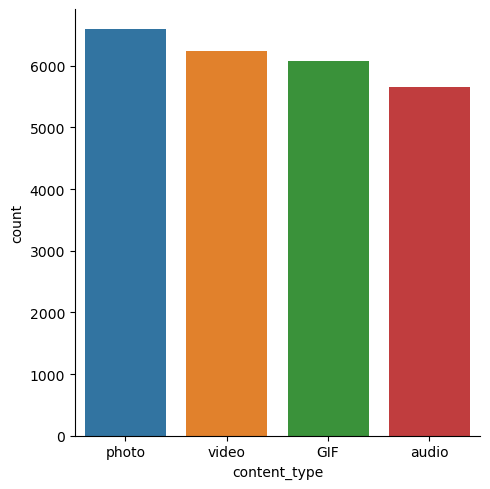

In [29]:
sns.catplot(kind='count', data=df, x='content_type')

## **Q:How many count for each content_type regarding to Sentiment?**

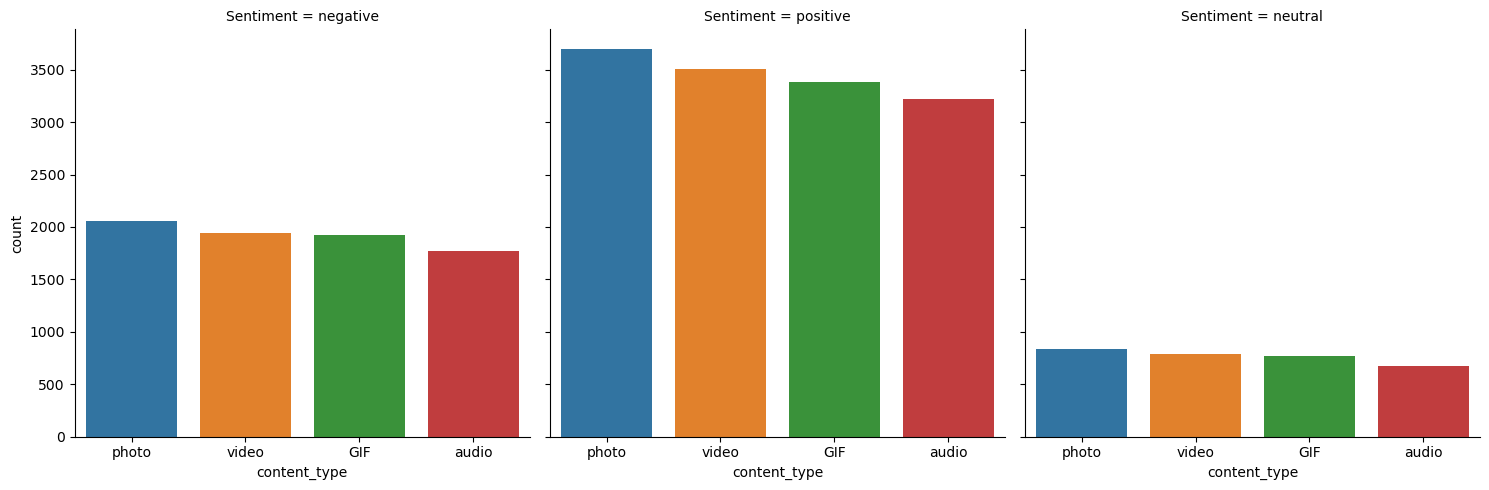

In [30]:
sns.catplot(kind='count', data=df, x='content_type', col='Sentiment')

In [31]:
df.groupby(['content_type', 'Sentiment']).agg({'Sentiment':'count'})

Sentiment
content_type Sentiment           
GIF          negative        1924
             neutral          774
             positive        3381
audio        negative        1771
             neutral          673
             positive        3216
photo        negative        2057
             neutral          832
             positive        3700
video        negative        1943
             neutral          792
             positive        3510

In [32]:
df.head()

,Content ID,content_type,Category,reactions_type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0


## **Q:What are Categories for each content_type?**